# Cosmologic Perturbations

This Notebook follows the prescription in [Chung-Pei Ma & Edmund Bertschinger](https://arxiv.org/abs/astro-ph/9506072) to obtain the perturbed equations in the Conformal Newtonian Gauge (Their Eq.30).

Special thanks to Prof. Suresh Kumar for the suggestion of performing this calculation.

In [1]:
import pytearcat as pt
import sympy as sp

In [2]:
eta,x,y,z = pt.coords('eta,x,y,z')
phi = pt.fun('phi','eta,x,y,z')
psi = pt.fun('psi','eta,x,y,z')
a = pt.fun('a','eta')
kappa = pt.con('kappa')
pt.order(kappa,1)
g = pt.metric('ds2 = a**2*(-(1+2*kappa*psi)*deta**2 + (1-2*kappa*phi)*dx**2+(1-2*kappa*phi)*dy**2+(1-2*kappa*phi)*dz**2)')

Remember that the time coordinate must be the first coordinate.

Dimension = 4
Coordinates = eta,x,y,z
Metric defined successfully: 



<IPython.core.display.Math object>

Matrix([
[-2*kappa*a(eta)**2*psi(eta, x, y, z) - a(eta)**2,                                                0,                                                0,                                                0],
[                                               0, -2*kappa*a(eta)**2*phi(eta, x, y, z) + a(eta)**2,                                                0,                                                0],
[                                               0,                                                0, -2*kappa*a(eta)**2*phi(eta, x, y, z) + a(eta)**2,                                                0],
[                                               0,                                                0,                                                0, -2*kappa*a(eta)**2*phi(eta, x, y, z) + a(eta)**2]])

In [3]:
# To compute Covariant derivatives

Chr = pt.christoffel()

<IPython.core.display.Latex object>

  0%|          | 0/64 [00:00<?, ?it/s]

Definition of the arbitrary functions to be used.

In [5]:
rho=pt.fun('rho','eta,x,y,z')
P=pt.fun('P','eta,x,y,z')
rho_bar = pt.fun('rhobar','eta')
drho = pt.fun('delta_rho','eta,x,y,z')
P_bar = pt.fun('Pbar','eta')
dP = pt.fun('delta_P','eta,x,y,z')
vx = pt.fun('v_x','eta,x,y,z')
vy = pt.fun('v_y','eta,x,y,z')
vz = pt.fun('v_z','eta,x,y,z')
w = pt.fun('w','eta')
delta = pt.fun('delta','eta,x,y,z')

Note that $w \equiv \frac{P}{\rho}$  and $\delta \equiv \frac{\delta \rho}{\bar{\rho}}$, as defined in the paper.

In [6]:
T=pt.ten('T',2)

# Defined as Eq.(25)

T_dat = [
         [-(rho_bar+kappa*delta*rho_bar),(rho_bar + w*rho_bar)*kappa*vx,(rho_bar + w*rho_bar)*kappa*vy,(rho_bar + w*rho_bar)*kappa*vz],
         [-(rho_bar + w*rho_bar)*kappa*vx,(w*rho_bar+kappa*dP),0,0],
         [-(rho_bar + w*rho_bar)*kappa*vy,0,(w*rho_bar+kappa*dP),0],
         [-(rho_bar + w*rho_bar)*kappa*vz,0,0,(w*rho_bar+kappa*dP)]
        ]

T.assign(T_dat,"^,_")
T.complete('^,_')

Elements assigned correctly to the components ^,_


T Tensor $T{_\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

T Tensor $T{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

T Tensor $T{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

In [7]:
T.simplify()
T.display('^,_',aslist=True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
CT_dat = pt.C(T('^mu,^nu'),'_mu')

CT = pt.ten('CT',1)

CT.assign(CT_dat,'^nu')

CT.simplify("^")

CT.display('^', aslist=True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Eq. (30a)

In [9]:
Eq30a = (CT('^0')*a**2/rho_bar).expand()
pt.display(Eq30a)

<IPython.core.display.Math object>

In [10]:
# We define H to simplify the expressions.
H = pt.fun('H','eta')

In [11]:
Eq30a = Eq30a.subs(sp.diff(a,eta)/a,H)
pt.display(Eq30a)

<IPython.core.display.Math object>

In [12]:
# Separate 0th and 1st order solutions of the temporal component.

Eq30a_1, Eq30a_0 = sp.Poly(Eq30a.removeO(),kappa).as_list()

pt.display(Eq30a_0)
pt.display(Eq30a_1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [13]:
Eq30a_00 = sp.solve(Eq30a_0,sp.diff(rho_bar)/rho_bar)[0]
pt.display(Eq30a_00)

<IPython.core.display.Math object>

The 0th order solution is used to replace

$$ \frac{\dot{\bar{\rho}}(\eta)}{\bar{\rho}(\eta)} = \displaystyle - 3 \left(w{\left(\eta \right)} + 1\right) H{\left(\eta \right)}$$

in the 1st order solution.

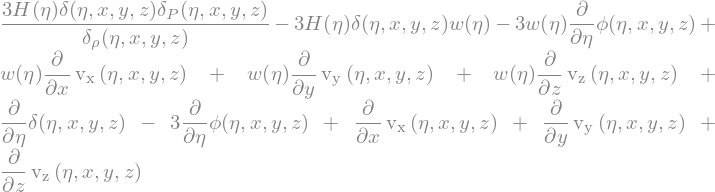

In [14]:
Eq30a_1 = sp.simplify(Eq30a_1.subs(sp.diff(rho_bar)/rho_bar,Eq30a_00))
Eq30a_1 = Eq30a_1.subs(rho_bar,drho/delta)
Eq30a_1

Where the following definition was used:

$$\delta = \frac{\delta \rho}{\bar{\rho}}$$.

Applying the Fourier Transform, where $f_k(\eta)$ is the Fourier Transform of $f(\eta,x,y,z)$.

In [15]:
deltak = pt.fun(r"delta_k",'eta')
phik = pt.fun(r"phi_k",'eta')
dPk = pt.fun(r"delta_P_k",'eta')
drhok = pt.fun(r"delta_rho_k",'eta')
theta = pt.fun("theta_k",'eta')

Where $\theta_k \equiv ik^j \hat{v}_j$ and $\hat{v}_j$ is the Fourier Transform of $v_j$

In [16]:
Eq30a_1 = sp.simplify(Eq30a_1.subs(sp.diff(vx,x),theta-sp.diff(vy,y)-sp.diff(vz,z)))

Eq30a_1 = Eq30a_1.subs(delta,deltak)
Eq30a_1 = Eq30a_1.subs(phi,phik)
Eq30a_1 = Eq30a_1.subs(drho,drhok)
Eq30a_1 = Eq30a_1.subs(dP,dPk)

# Solve for dot{delta_k}

Sol_Eq30a_1 = sp.simplify(sp.solve(Eq30a_1,sp.diff(deltak,eta))[0])

pt.display(Sol_Eq30a_1)

<IPython.core.display.Math object>

$$ \boxed{\dot{\delta}_k =\displaystyle - \frac{3 H{\left(\eta \right)} \delta_{P k}{\left(\eta \right)} \delta_{k}{\left(\eta \right)}}{\delta_{\rho k}{\left(\eta \right)}} + 3 H{\left(\eta \right)} \delta_{k}{\left(\eta \right)} w{\left(\eta \right)} - \theta_{k}{\left(\eta \right)} w{\left(\eta \right)} - \theta_{k}{\left(\eta \right)} + 3 w{\left(\eta \right)} \frac{d}{d \eta} \phi_{k}{\left(\eta \right)} + 3 \frac{d}{d \eta} \phi_{k}{\left(\eta \right)} }$$

This corresponds to Eq(30a).

### Eq. (30b)

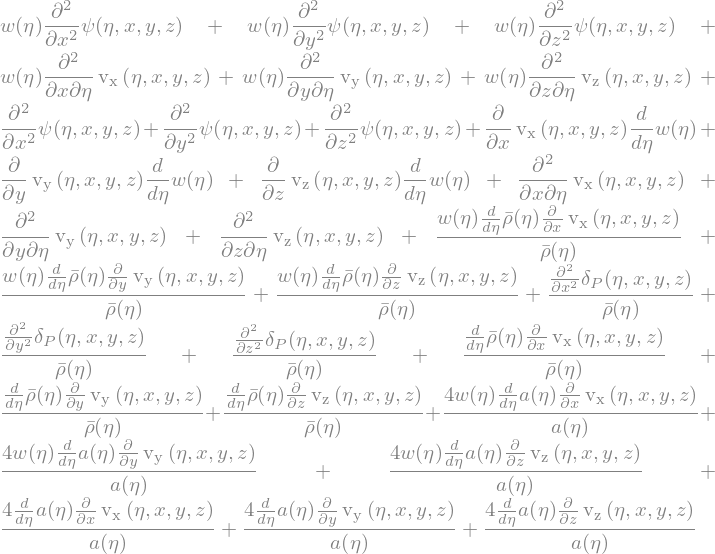

In [17]:
# The sum of the derivatives of the spatial components gives

Eq30b = (((sp.diff(CT('^1'),x)+sp.diff(CT('^2'),y)+sp.diff(CT('^3'),z))*a**2/rho_bar).expand()).removeO()
Eq30b = Eq30b.subs(kappa,1) # Replaced by 1 since it only contains 1st order terms

Eq30b

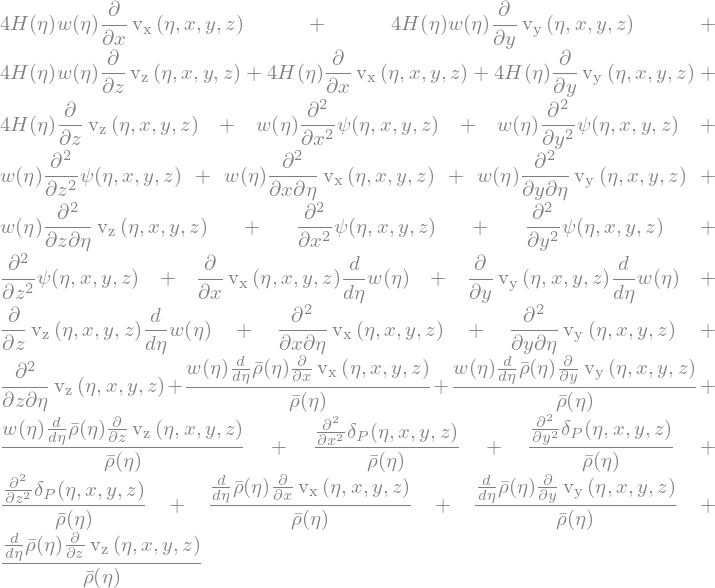

In [18]:
# Introducing H to simplify the expressions
Eq30b = Eq30b.subs(sp.diff(a,eta)/a,H)
Eq30b

Applying the Fourier transform

In [19]:
psik = pt.fun(r"psi_k",'eta')
k = pt.con('k')

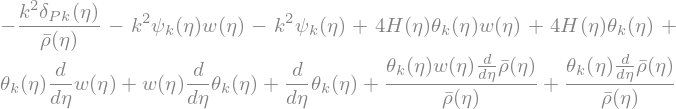

In [20]:
Eq30b = sp.expand(Eq30b.subs(sp.diff(psi,x,2),-k**2*psik - sp.diff(psi,y,2) - sp.diff(psi,z,2)))
Eq30b = sp.expand(sp.simplify(Eq30b.subs(sp.diff(vx,x),theta - sp.diff(vy,y) - sp.diff(vz,z))))
Eq30b = sp.expand(sp.simplify(Eq30b.subs(sp.diff(dP,x,2),-k**2*dPk - sp.diff(dP,y,2) - sp.diff(dP,z,2))))
Eq30b = Eq30b.subs(delta,deltak)
Eq30b = Eq30b.subs(drho,drhok)

Eq30b

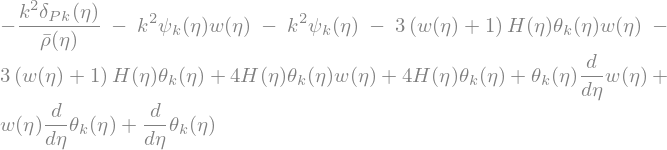

In [21]:
# Using the 0th order solution of the temporal component

Eq30b = Eq30b.subs(sp.diff(rho_bar)/rho_bar,Eq30a_00)
Eq30b

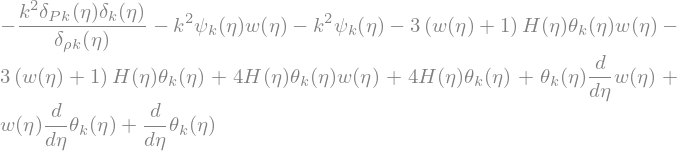

In [22]:
# Including the definition of delta = diff(rho_bar)/rho_bar

Eq30b = Eq30b.subs(rho_bar,drhok/deltak)
Eq30b

At this point, the same solution in Eq.(30b) is obtained. Only some extra algebra is required to rewrite this expression in the same way as in Eq.(30b).

Solving for $\dot{\theta}_k(\eta)$:

$$ \dot{\theta}_k(\eta) = \frac{1}{1+w(\eta)}\left(\displaystyle \frac{k^{2} \delta_{P k}{\left(\eta \right)} \delta_{k}{\left(\eta \right)}}{\delta_{\rho k}{\left(\eta \right)}} + k^{2} \psi_{k}{\left(\eta \right)} w{\left(\eta \right)} + k^{2} \psi_{k}{\left(\eta \right)} + 3 \left(w{\left(\eta \right)} + 1\right) H{\left(\eta \right)} \theta_{k}{\left(\eta \right)} w{\left(\eta \right)} + 3 \left(w{\left(\eta \right)} + 1\right) H{\left(\eta \right)} \theta_{k}{\left(\eta \right)} - 4 H{\left(\eta \right)} \theta_{k}{\left(\eta \right)} w{\left(\eta \right)} - 4 H{\left(\eta \right)} \theta_{k}{\left(\eta \right)} - \theta_{k}{\left(\eta \right)} \frac{d}{d \eta} w{\left(\eta \right)} \right)$$

Combining common terms:

$$ \dot{\theta}_k(\eta) = \frac{1}{w(\eta)+1}\left(\displaystyle \frac{k^{2} \delta_{P k}{\left(\eta \right)} \delta_{k}{\left(\eta \right)}}{\delta_{\rho k}{\left(\eta \right)}} + k^{2} (w(\eta)+1)\psi_{k}{\left(\eta \right)} + 3 \left(w{\left(\eta \right)} + 1\right) H{\left(\eta \right)} \theta_{k}{\left(\eta \right)} w{\left(\eta \right)} + 3 \left(w{\left(\eta \right)} + 1\right) H{\left(\eta \right)} \theta_{k}{\left(\eta \right)} - 4 H{\left(\eta \right)} \theta_{k}{\left(\eta \right)} ( w{\left(\eta \right)}+1 ) - \theta_{k}{\left(\eta \right)} \dot{w}{\left(\eta \right)} \right)$$

$$ \dot{\theta}_k(\eta) = \displaystyle \frac{ \frac{\delta_{P k}{\left(\eta \right)}}{\delta_{\rho k}{\left(\eta \right)}}}{(w(\eta)+1)} k^{2}\delta_{k}{\left(\eta \right)} + k^{2} \psi_{k}{\left(\eta \right)} + 3 H{\left(\eta \right)} \theta_{k}{\left(\eta \right)} w{\left(\eta \right)} + 3 H{\left(\eta \right)} \theta_{k}{\left(\eta \right)} - 4 H{\left(\eta \right)} \theta_{k}{\left(\eta \right)} -  \frac{\dot{w}{\left(\eta \right)}}{(w(\eta)+1)}\theta_{k}{\left(\eta \right)}$$

$$ \dot{\theta}_k(\eta) = \displaystyle \frac{ \frac{\delta_{P k}{\left(\eta \right)}}{\delta_{\rho k}{\left(\eta \right)}}}{(w(\eta)+1)} k^{2}\delta_{k}{\left(\eta \right)} + k^{2} \psi_{k}{\left(\eta \right)} + 3 H{\left(\eta \right)} \theta_{k}{\left(\eta \right)} w{\left(\eta \right)} - H{\left(\eta \right)} \theta_{k}{\left(\eta \right)}  -  \frac{\dot{w}{\left(\eta \right)}}{(w(\eta)+1)}\theta_{k}{\left(\eta \right)}$$

$$ \dot{\theta}_k(\eta) = \displaystyle \frac{ \frac{\delta_{P k}{\left(\eta \right)}}{\delta_{\rho k}{\left(\eta \right)}}}{(w(\eta)+1)} k^{2}\delta_{k}{\left(\eta \right)} + k^{2} \psi_{k}{\left(\eta \right)} - H{\left(\eta \right)}(1-3w{\left(\eta \right)}) \theta_{k}{\left(\eta \right)}   -  \frac{\dot{w}{\left(\eta \right)}}{(w(\eta)+1)}\theta_{k}{\left(\eta \right)}$$

$$ \boxed{
\dot{\theta}_k(\eta) = - H{\left(\eta \right)}(1-3w{\left(\eta \right)}) \theta_{k}{\left(\eta \right)}  -  \frac{\dot{w}{\left(\eta \right)}}{(w(\eta)+1)}\theta_{k}{\left(\eta \right)} + \displaystyle \frac{ \delta_{P k}\left(\eta \right)/\delta_{\rho k}\left(\eta \right)}{(w(\eta)+1)} k^{2}\delta_{k}{\left(\eta \right)} + k^{2} \psi_{k}{\left(\eta \right)}.   
} $$

This equation corresponds to Eq.(30b) considering $\sigma = 0$ since we have not included any anisotropy in the Energy-Momentum tensor.